In [3]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import matplotlib
import pickle
import seaborn

In [2]:
def draw_hist(alldata, numbins=25, mybins=None, density=False, stacked=False,
              xlabel=None, xlim=None, xticks=None, xticklabs=None,
              ylabel=None, ylim=None, yticks=None, yticklabs=None,
              palette=None, Title=None):
    if not mybins:
        mybins = numbins
        if xlim:
            mybins = np.linspace(xlim[0], xlim[1], numbins)

    fig, ax = plt.subplots()
    plot = ax.hist(alldata, bins=mybins, color=palette, density=density, stacked=stacked,
                   label=["Conserved", "Old Unique", "New Unique"])

    if xlabel is not None:
        _ = ax.set_xlabel(xlabel)
    if xticks is not None:
        _ = ax.set_xticks(xticks)
    if xticklabs is not None:
        _ = ax.set_xticklabels(xticklabs)
    if ylabel is not None:
        _ = ax.set_ylabel(ylabel)
    if yticks is not None:
        _ = ax.set_yticks(yticks)
    if yticklabs is not None:
        _ = ax.set_yticklabels(yticklabs)
    if xlim:
        _ = ax.set_xlim(xlim[0], xlim[1])
    if ylim:
        _ = ax.set_ylim(ylim[0], ylim[1])
    _ = ax.legend(loc='upper right', ncol=1, fontsize=16)
    # Cleanup
    seaborn.despine(left=True)
    if Title is not None:
        _ = matplotlib.pyplot.title(Title, fontsize=24)
        _ = matplotlib.pyplot.suptitle("")
    else:
        _ = matplotlib.pyplot.title("")
        _ = matplotlib.pyplot.suptitle("")

In [6]:
status = ['Mapped to Araport','Unique to TAIR10']
iloci = ['siLocus', 'ciLocus', 'niLocus', 'iiLocus', 'fiLocus']
Atha_counts = [26660,26819-26660,307,307-307,5111,5111-5111,8240,8244-8240,5,2]
d = {'Type': ['siLocus','siLocus','ciLocus','ciLocus','niLocus','niLocus','iiLocus',
         'iiLocus','fiLocus','fiLocus'], 'Status': status*5, 'Counts': Atha_counts}

In [7]:
Atha = pd.DataFrame(data = d)
Atha_pivot = Atha.pivot(index = 'Type', columns = 'Status', values = 'Counts')
Atha_pivot = Atha_pivot.loc[['siLocus', 'ciLocus', 'niLocus', 'iiLocus', 'fiLocus'],:]
Atha_pivot

Status,Mapped to Araport,Unique to TAIR10
Type,,
siLocus,26660,159
ciLocus,307,0
niLocus,5111,0
iiLocus,8240,4
fiLocus,5,2


In [4]:
status = ['Mapped to HAv3.2', 'Unique to 4.5']
Amel_counts = [4837,9895-4837,75,387-75,1435,3083-1435,1453,4165-1453,1940,5083-1940]
d = {'Type': ['siLocus','siLocus','ciLocus','ciLocus','niLocus','niLocus','iiLocus',
         'iiLocus','fiLocus','fiLocus'], 'Status': status*5, 'Counts': Amel_counts}

In [5]:
Amel = pd.DataFrame(data = d)
Amel_pivot = Amel.pivot(index = 'Type', columns = 'Status', values = 'Counts')
Amel_pivot = Amel_pivot.loc[['siLocus', 'ciLocus', 'niLocus', 'iiLocus', 'fiLocus'],:]

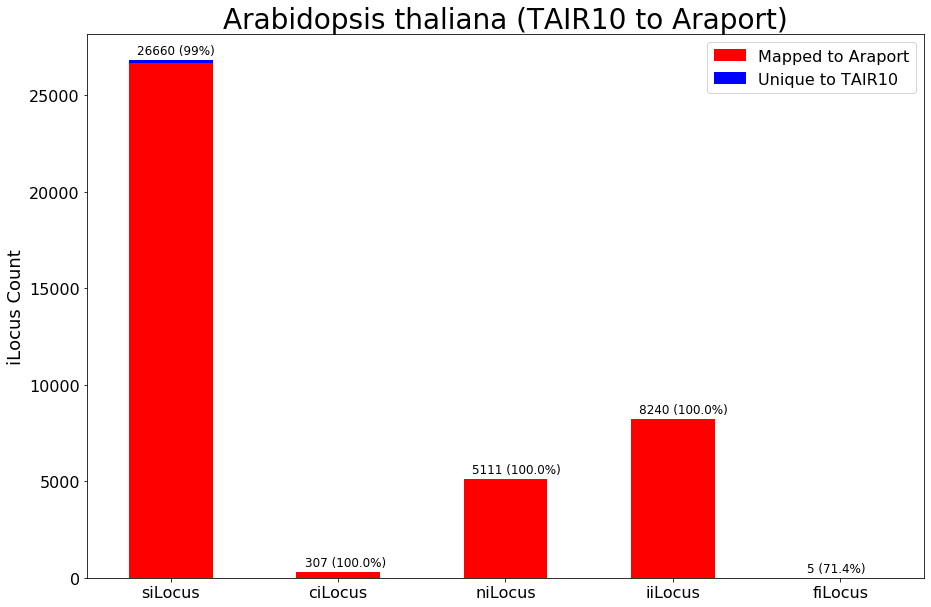

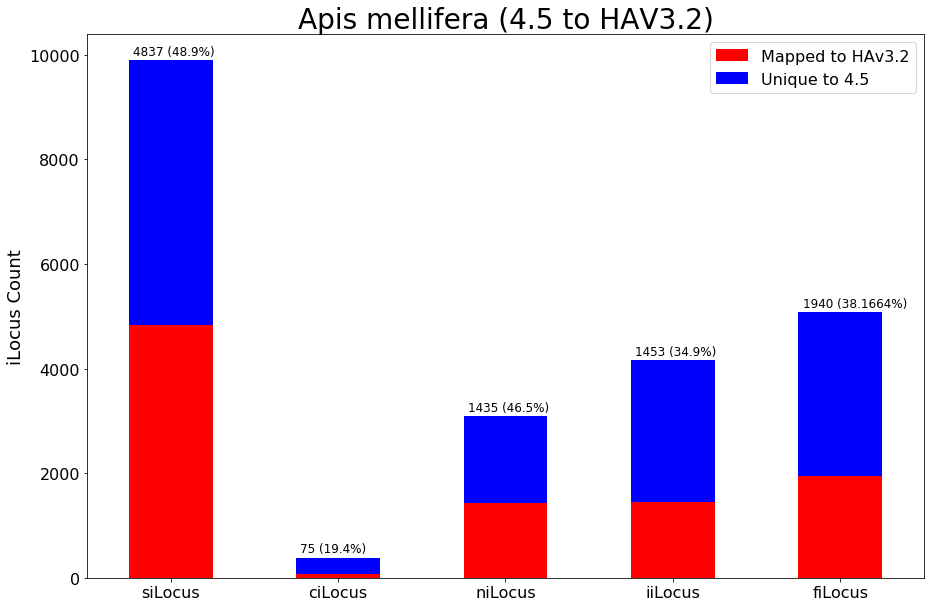

In [8]:
plot = Atha_pivot.plot.bar(stacked = True, color = ['r','b'], 
                           fontsize=16, rot=0, figsize=(15,10))
_ = plot.set_title("Arabidopsis thaliana (TAIR10 to Araport)", fontsize = 28)
_ = plot.legend(prop={'size': 16})
_ = plt.xlabel('')
_ = plt.ylabel('iLocus Count')
_ = plot.yaxis.label.set_fontsize(18)
for i in range(5):
    conservation = 100*Atha_counts[2*i] / (Atha_counts[2*i] + Atha_counts[2*i + 1])
    if i == 0:
        conservation = int(round(conservation, 0))
    else:
        conservation = round(conservation, 1)
    plt.text(i-0.2, (Atha_pivot.sum(axis = 1)[i]) + 300, str(Atha_counts[2*i]) + ' ('
                 + str(conservation) + '%)', fontsize = 12)
plot = Amel_pivot.plot.bar(stacked = True, color = ['r','b'], 
                           fontsize=16, rot=0, figsize=(15,10))
_ = plot.set_title("Apis mellifera (4.5 to HAV3.2)", fontsize = 28)
_ = plot.legend(prop={'size': 16})
_ = plt.xlabel('')
_ = plt.ylabel('iLocus Count')
_ = plot.yaxis.label.set_fontsize(18)
for i in range(5):
    conservation = 100*Amel_counts[2*i] / (Amel_counts[2*i] + Amel_counts[2*i + 1])
    if i == 4:
        conservation = round(conservation, 4)
    else:
        conservation = round(conservation, 1)
    plt.text(i-0.225, (Amel_pivot.sum(axis = 1)[i]) + 100, str(Amel_counts[2*i]) + ' ('
                 + str(conservation) + '%)', fontsize = 12)

In [9]:
with open('Atha/Atha-conserved','rb') as f:
    rel = pickle.load(f)
conserved = []
matched_new = []
for key in rel:
    conserved.append(key)
    for ilocus in rel[key]:
        matched_new.append(ilocus)
Atha = pd.read_csv('Atha/Atha.iloci.tsv',sep='\t')
At11 = pd.read_csv('Atha/At11.iloci.tsv',sep='\t')
Atha['LogLength'] = np.log10(Atha['Length'])
At11['LogLength'] = np.log10(At11['Length'])

In [10]:
Atha_iloci = set(Atha.LocusId)
At11_iloci = set(At11.LocusId)
conserved = set(conserved)
matched_new = set(matched_new)
unique_old = Atha_iloci - conserved
unique_new = At11_iloci - matched_new
Atha_conserved = Atha.loc[(Atha.LocusId.isin(conserved))]
Atha_unique = Atha.loc[(Atha.LocusId.isin(unique_old))]
At11_unique = At11.loc[(At11.LocusId.isin(unique_new))]
data = [Atha_conserved['LogLength'], Atha_unique['LogLength'], At11_unique['LogLength']]

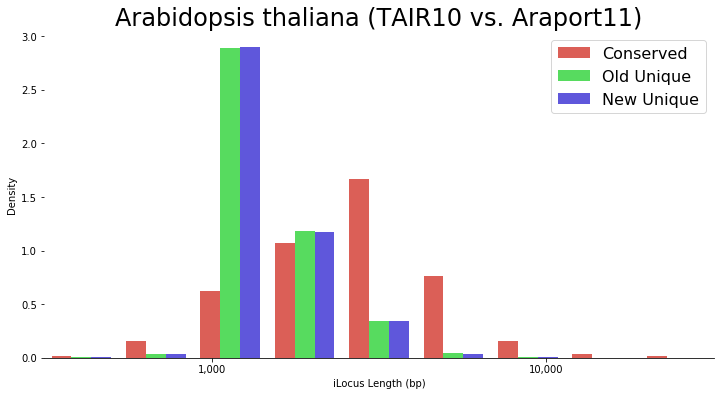

In [11]:
seaborn.set_context({"figure.figsize": (12, 6)})
plot = draw_hist(data, ylabel='Density', numbins=10, density=True,
          palette=seaborn.color_palette("hls", len(data)),
          xlabel='iLocus Length (bp)', xlim=(2.5, 4.5),
          xticks=(3,4), xticklabs=('1,000', '10,000'),
         Title="Arabidopsis thaliana (TAIR10 vs. Araport11)")

In [12]:
with open('Amel/Amel-conserved','rb') as f:
    rel = pickle.load(f)
conserved = []
matched_new = []
for key in rel:
    conserved.append(key)
    for ilocus in rel[key]:
        matched_new.append(ilocus)
Amel = pd.read_csv('Amel/Amel.iloci.tsv',sep='\t')
Amh3 = pd.read_csv('Amel/Amh3.iloci.tsv',sep='\t')
Amel['LogLength'] = np.log10(Amel['Length'])
Amh3['LogLength'] = np.log10(Amh3['Length'])

In [13]:
Amel_iloci = set(Amel.LocusId)
Amh3_iloci = set(Amh3.LocusId)
conserved = set(conserved)
matched_new = set(matched_new)
unique_old = Amel_iloci - conserved
unique_new = Amh3_iloci - matched_new
Amel_conserved = Amel.loc[(Amel.LocusId.isin(conserved))]
Amel_unique = Amel.loc[(Amel.LocusId.isin(unique_old))]
Amh3_unique = Amh3.loc[(Amh3.LocusId.isin(unique_new))]
data = [Amel_conserved['LogLength'], Amel_unique['LogLength'], Amh3_unique['LogLength']]

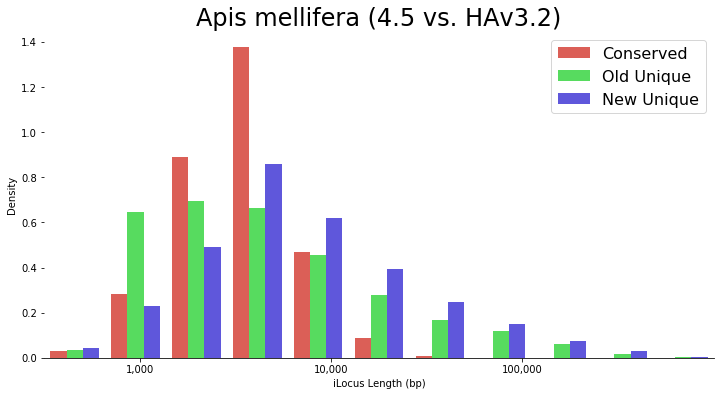

In [14]:
draw_hist(data, ylabel='Density', numbins=12, density=True,
          palette=seaborn.color_palette("hls", len(data)),
          xlabel='iLocus Length (bp)', xlim=(2.5, 6),
          xticks=(3,4,5), xticklabs=('1,000', '10,000', '100,000'),
         Title="Apis mellifera (4.5 vs. HAv3.2)")
